In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
customerDf=pd.read_csv('C:/Users/wjyjy/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
# shape of df
customerDf.shape

(7043, 21)

In [4]:

pd.set_option('display.max_columns',None)

customerDf.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [5]:
pd.isnull(customerDf).sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
customerDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
for x in customerDf.columns:
    test=customerDf.loc[:,x].value_counts()
    print('The number of rows of {0}：{1}'.format(x,test.sum()))
    print('The type of {0}：{1}'.format(x,customerDf[x].dtypes))
    print('The context of {0}：\n{1}\n'.format(x,test))

The number of rows of customerID：7043
The type of customerID：object
The context of customerID：
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

The number of rows of gender：7043
The type of gender：object
The context of gender：
Male      3555
Female    3488
Name: gender, dtype: int64

The number of rows of SeniorCitizen：7043
The type of SeniorCitizen：int64
The context of SeniorCitizen：
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

The number of rows of Partner：7043
The type of Partner：object
The context of Partner：
No     3641
Yes    3402
Name: Partner, dtype: int64

The number of rows of Dependents：7043
The type of Dependents：object
The context of Dependents：
No     4933
Yes    2110
Name: Dependents, dtype: int64

The number of rows of tenure：7043
The type of tenure：int64
The context of tenure：
1     613
72

- We found 11 users with missing data in the "TotalCharges" column

In [8]:
customerDf['TotalCharges']=customerDf['TotalCharges'].apply(lambda x: np.NaN if str(x).isspace() else x)

In [9]:
customerDf['TotalCharges']=customerDf[['TotalCharges']].astype(float)

In [10]:
pd.isnull(customerDf).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
print(customerDf[customerDf['TotalCharges']!=customerDf['TotalCharges']][['tenure','MonthlyCharges','TotalCharges','Churn']])

      tenure  MonthlyCharges  TotalCharges Churn
488        0           52.55           NaN    No
753        0           20.25           NaN    No
936        0           80.85           NaN    No
1082       0           25.75           NaN    No
1340       0           56.05           NaN    No
3331       0           19.85           NaN    No
3826       0           25.35           NaN    No
4380       0           20.00           NaN    No
5218       0           19.70           NaN    No
6670       0           73.35           NaN    No
6754       0           61.90           NaN    No


- We found that these 11 users have a 'tenure' (length of time on the network) of 0, presumably they are new to the network in the current month. Even if the users lost in the month of registration, they still need to pay the current month's fee. Therefore, we change the length of time these 11 users have been on the network to 1, and fill the total consumption amount with the monthly consumption amount, which is in line with the actual situation

In [12]:
customerDf=customerDf.fillna(method='pad',axis=1)
customerDf['TotalCharges']=customerDf[['TotalCharges']].astype(float)
customerDf['SeniorCitizen']=customerDf[['SeniorCitizen']].astype(int)
customerDf['tenure']=customerDf[['tenure']].astype(int)
customerDf['MonthlyCharges']=customerDf[['MonthlyCharges']].astype(float)

In [13]:
print(customerDf[customerDf['tenure']==0][['tenure','MonthlyCharges','TotalCharges']])

      tenure  MonthlyCharges  TotalCharges
488        0           52.55         52.55
753        0           20.25         20.25
936        0           80.85         80.85
1082       0           25.75         25.75
1340       0           56.05         56.05
3331       0           19.85         19.85
3826       0           25.35         25.35
4380       0           20.00         20.00
5218       0           19.70         19.70
6670       0           73.35         73.35
6754       0           61.90         61.90


- View the number and percentage of churned users

In [14]:
def savePic(name):
    plt.savefig('C:/Users/wjyjy/Downloads/{0}.png'.format(name), dpi=600,bbox_inches='tight')

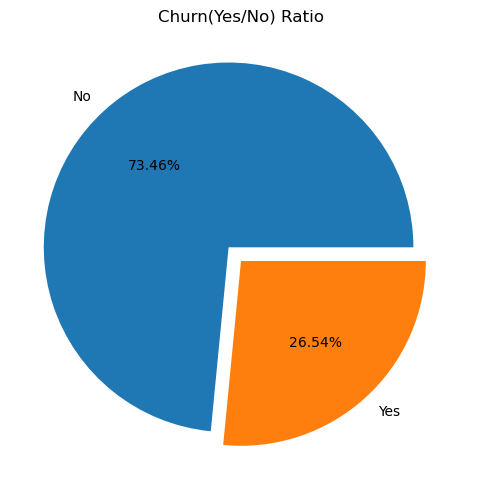

In [15]:
plt.rcParams['figure.figsize']=6,6
plt.pie(customerDf['Churn'].value_counts(),labels=customerDf['Churn'].value_counts().index,autopct='%1.2f%%',explode=(0.1,0))
plt.title('Churn(Yes/No) Ratio')
savePic('Churn(Yes or No) Ratio')
plt.show()

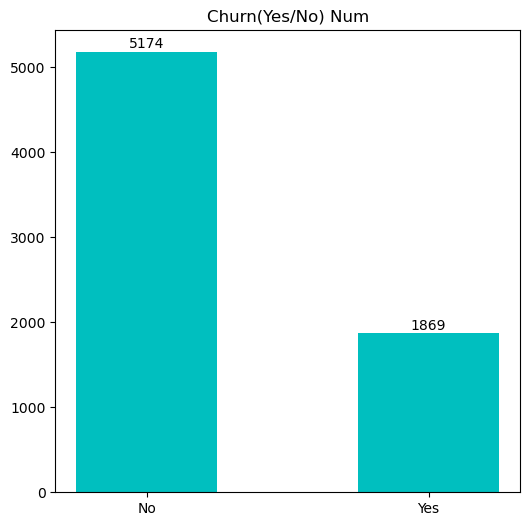

In [16]:
churnDf=customerDf['Churn'].value_counts().to_frame()
x=churnDf.index
y=churnDf['Churn']

plt.bar(x,y,width = 0.5,color = 'c')
plt.title('Churn(Yes/No) Num')
for a,b in zip(x,y):
    plt.text(a,b+10,'%.0f' % b, ha='center', va= 'bottom')
savePic('Churn(Yes or No) Num')
plt.show();

- It is an unbalanced data set, with 26.54% of churned users.

C:\Users\wjyjy\AppData\Local\Temp\ipykernel_29996\82749636.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


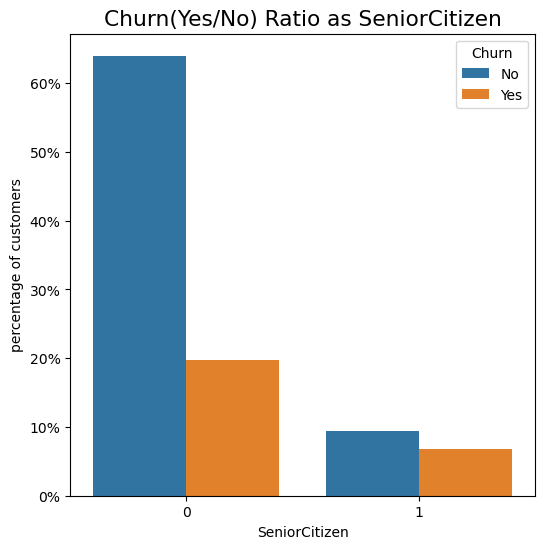

C:\Users\wjyjy\AppData\Local\Temp\ipykernel_29996\82749636.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])


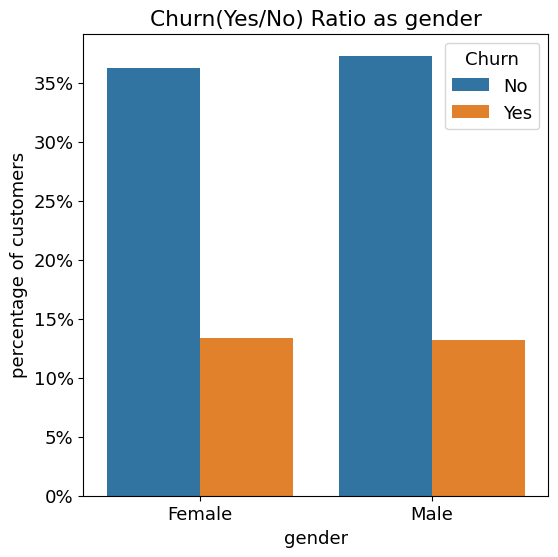

In [17]:
def barplot_percentages(feature,orient='v',axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = (customerDf.groupby(feature)["Churn"].value_counts()/len(customerDf)).to_frame()
    g.rename(columns={"Churn":axis_name},inplace=True)
    g.reset_index(inplace=True)

    #print(g)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        plt.rcParams.update({'font.size': 13})
        #plt.legend(fontsize=10)
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
        #plt.legend(fontsize=10)
    plt.title('Churn(Yes/No) Ratio as {0}'.format(feature))
    savePic('Churn(Yes or No) Ratio as {0}'.format(feature))
    plt.show()
barplot_percentages("SeniorCitizen")
barplot_percentages("gender")

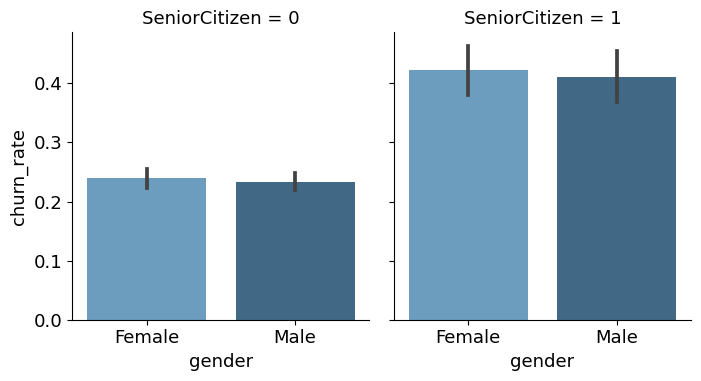

In [18]:
customerDf['churn_rate'] = customerDf['Churn'].replace("No", 0).replace("Yes", 1)
g = sns.FacetGrid(customerDf, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "churn_rate", palette = "Blues_d", order= ['Female', 'Male'])
plt.rcParams.update({'font.size': 13})
savePic('Churn(Yes or No) Ratio as gender and SeniorCitizen')
plt.show()

- User churn is independent of gender; older users account for a significantly higher percentage of churn than younger users.

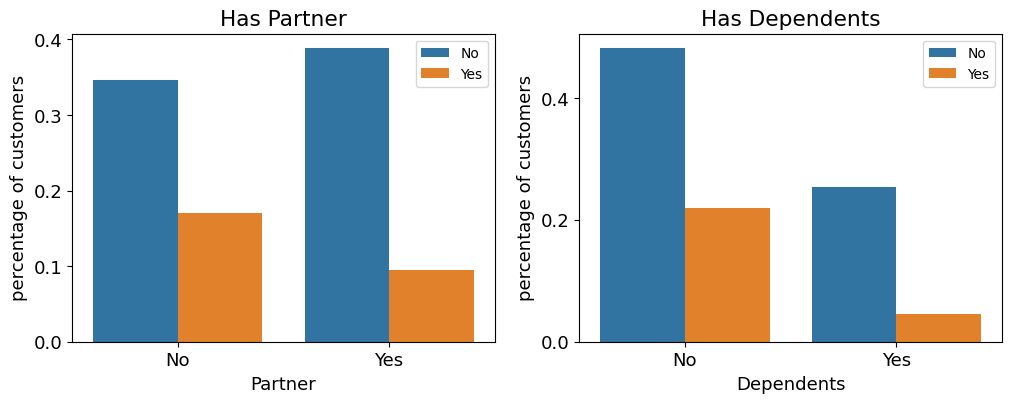

In [19]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has Partner")
axis[1].set_title("Has Dependents")
axis_y = "percentage of customers"

# Plot Partner column
gp_partner = (customerDf.groupby('Partner')["Churn"].value_counts()/len(customerDf)).to_frame()
gp_partner.rename(columns={"Churn": axis_y}, inplace=True)
gp_partner.reset_index(inplace=True)
ax1 = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
ax1.legend(fontsize=10)


# Plot Dependents column
gp_dep = (customerDf.groupby('Dependents')["Churn"].value_counts()/len(customerDf)).to_frame()
#print(gp_dep)
gp_dep.rename(columns={"Churn": axis_y} , inplace=True)
#print(gp_dep)
gp_dep.reset_index(inplace=True)
#print(gp_dep)

ax2 = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])



plt.rcParams.update({'font.size': 20})
ax2.legend(fontsize=10)


savePic('Churn(Yes or No) Ratio as partner and dependents')
plt.show()

- The churn rate of users with partners is lower than that of users without partners; the churn rate of users with dependents is lower than that of users without dependents.

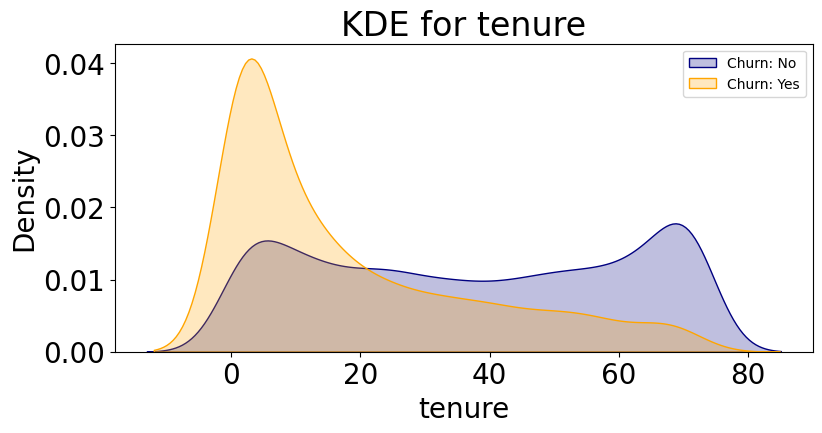

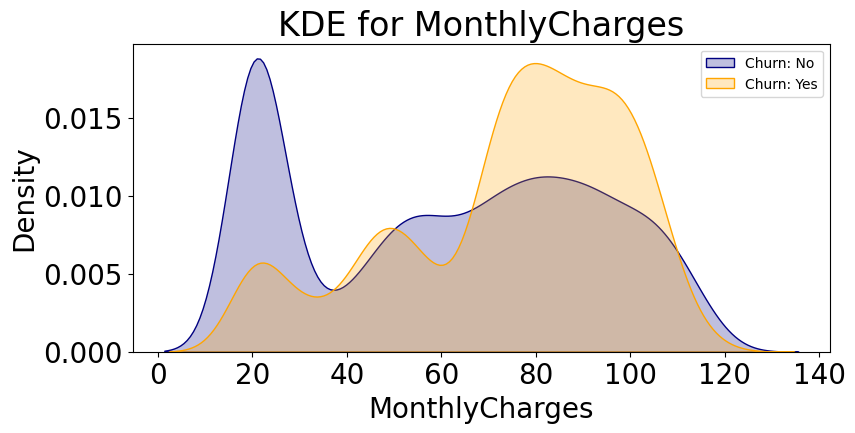

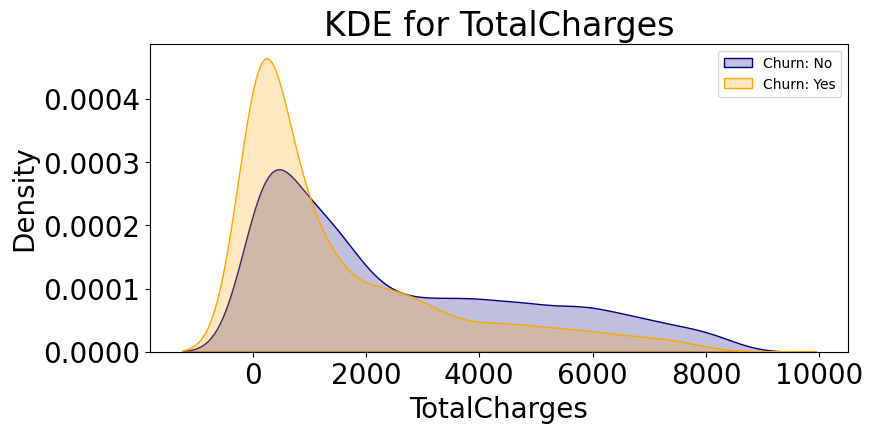

In [20]:
# Kernel density estimaton
def kdeplot(feature,xlabel):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(customerDf[customerDf['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No', shade='True')
    ax1 = sns.kdeplot(customerDf[customerDf['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes',shade='True')
    plt.xlabel(xlabel)
    plt.rcParams.update({'font.size': 20})
    plt.legend(fontsize=10)
kdeplot('tenure','tenure')
savePic('Churn(Yes or No) Ratio as tenure kde')
kdeplot('MonthlyCharges','MonthlyCharges')
savePic('Churn(Yes or No) Ratio as MonthlyCharges kde')
kdeplot('TotalCharges','TotalCharges')
savePic('Churn(Yes or No) Ratio as TotalCharges kde')
plt.show();

C:\Users\wjyjy\AppData\Local\Temp\ipykernel_29996\82749636.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


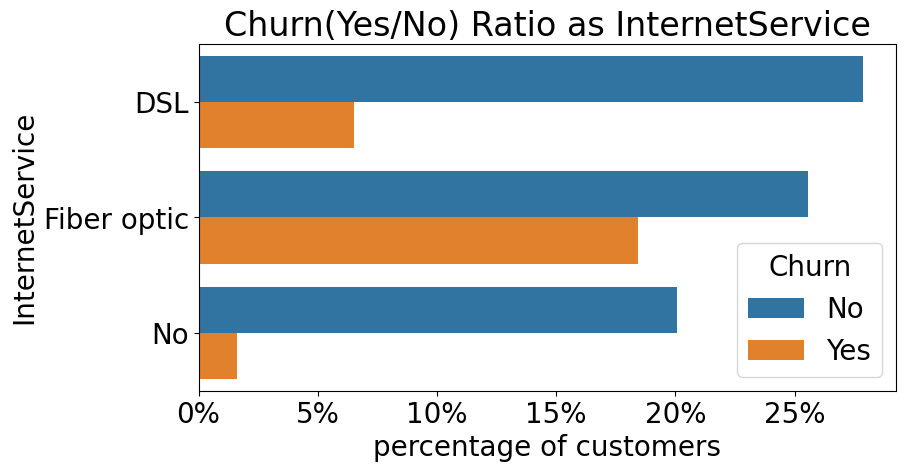

In [21]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h");

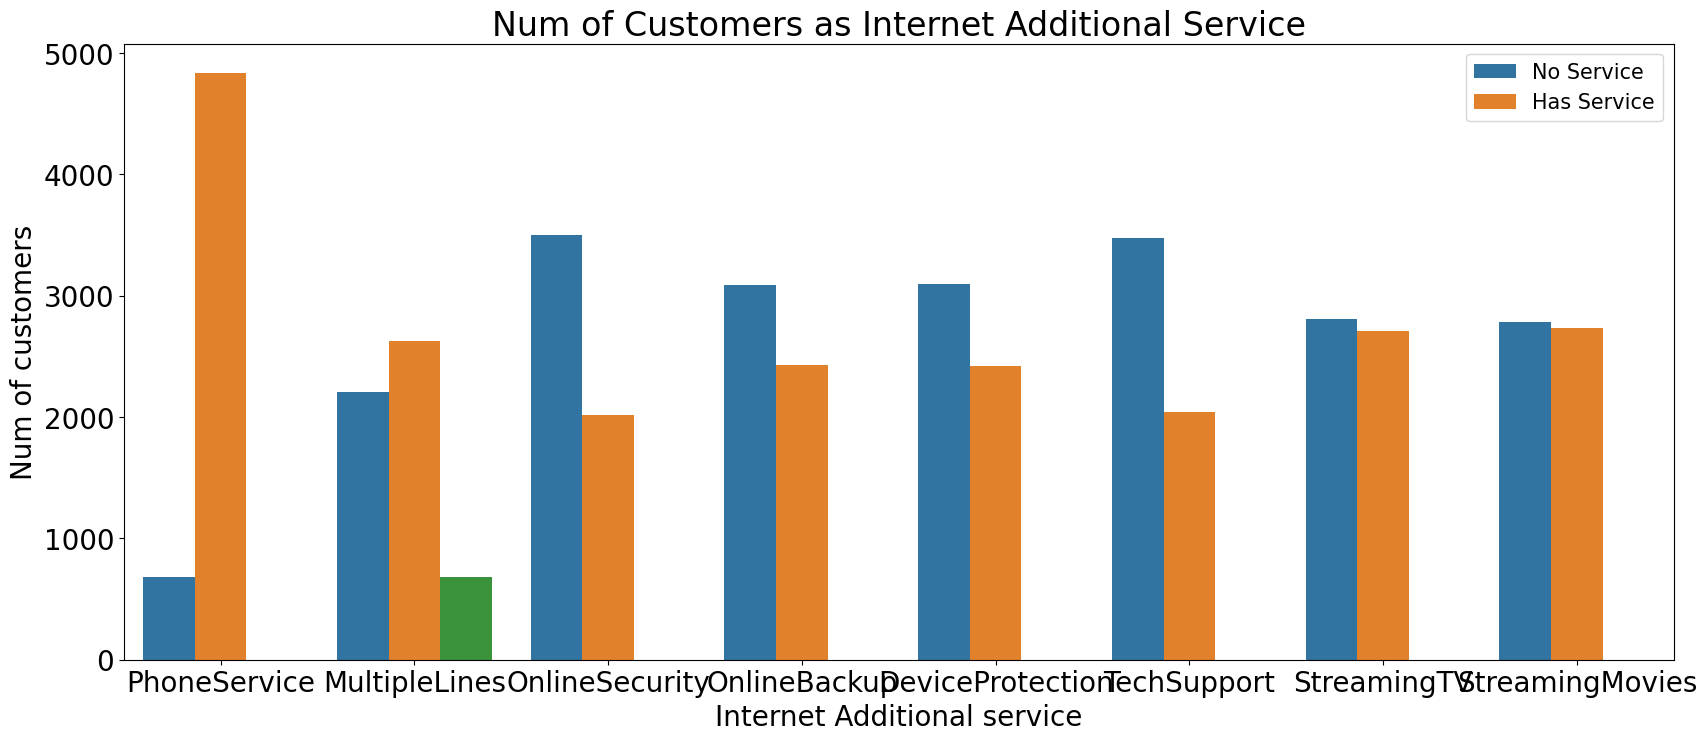

In [22]:
cols = ["PhoneService","MultipleLines","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(customerDf[customerDf["InternetService"] != "No"][cols])
df1.rename(columns={'value': 'Has service'},inplace=True)
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Internet Additional service', ylabel='Num of customers')
plt.rcParams.update({'font.size':20})
plt.legend( labels = ['No Service', 'Has Service'],fontsize=15)
plt.title('Num of Customers as Internet Additional Service')
savePic('Churn(Yes or No) Num as Internet Additional Service')
plt.show()

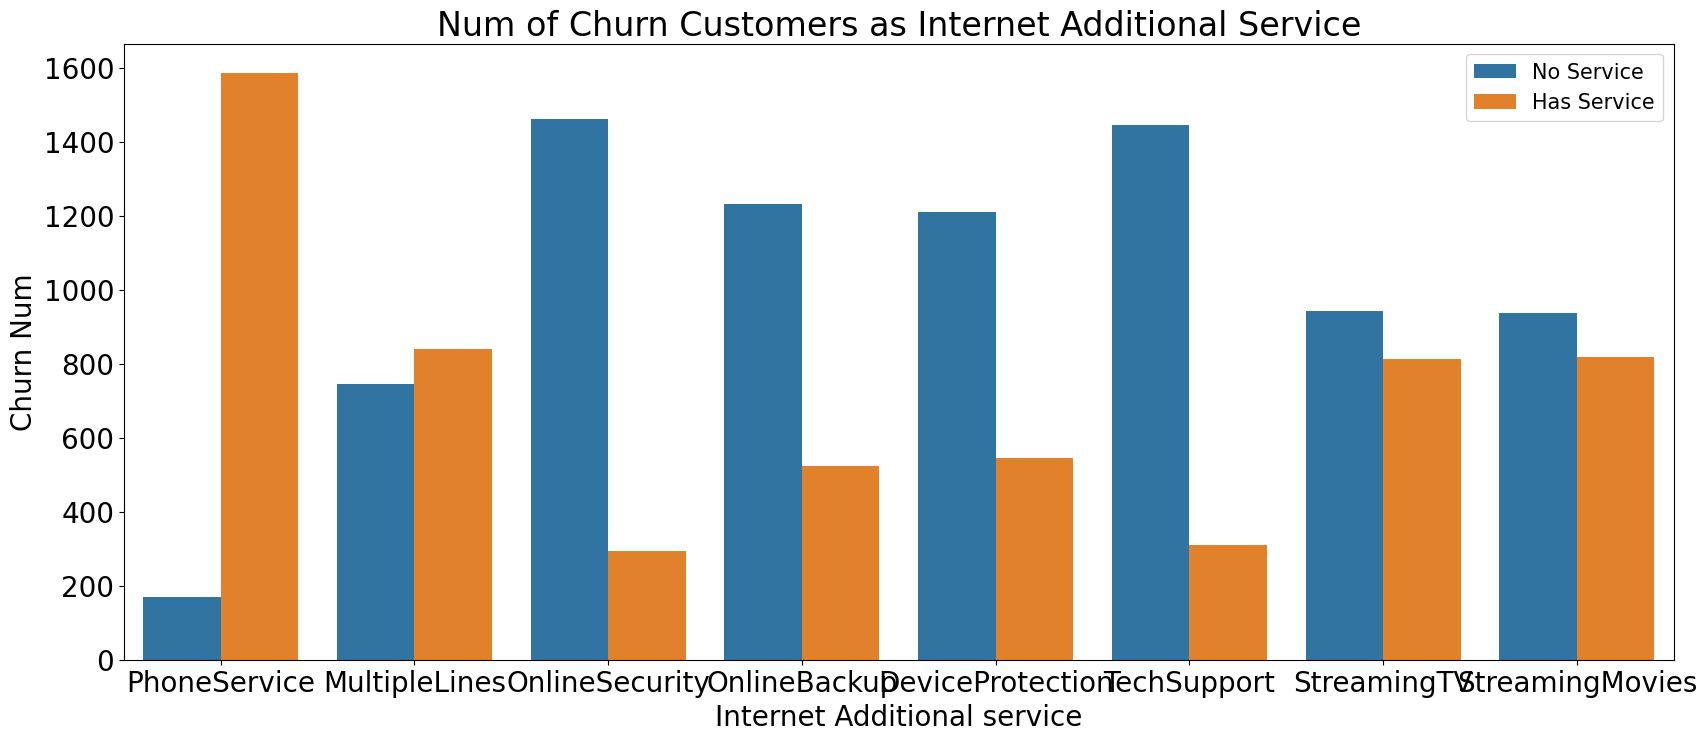

In [23]:
plt.figure(figsize=(20, 8))
df1 = customerDf[(customerDf.InternetService != "No") & (customerDf.Churn == "Yes")]
df1 = pd.melt(df1[cols])
df1.rename(columns={'value': 'Has service'}, inplace=True)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Internet Additional service', ylabel='Churn Num')
plt.rcParams.update({'font.size':20})
plt.legend( labels = ['No Service', 'Has Service'],fontsize=15)
plt.title('Num of Churn Customers as Internet Additional Service')
savePic('Churn Num as Internet Additional Service')
plt.show()

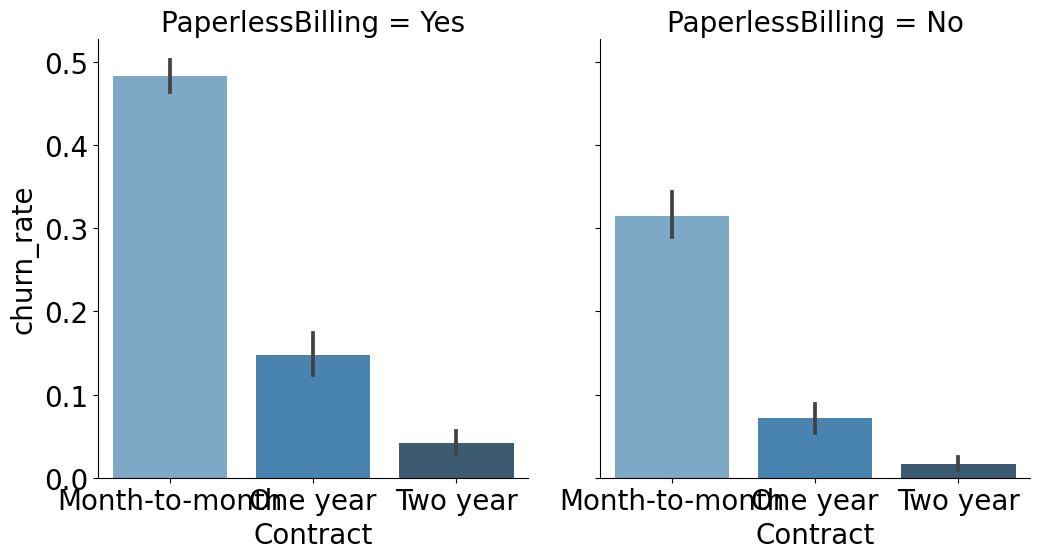

In [24]:
g = sns.FacetGrid(customerDf, col="PaperlessBilling", height=6, aspect=.9)
ax = g.map(sns.barplot, "Contract", "churn_rate", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])
plt.rcParams.update({'font.size':18})
savePic('Churn Ratio as PaperlessBilling')
plt.show()

C:\Users\wjyjy\AppData\Local\Temp\ipykernel_29996\82749636.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


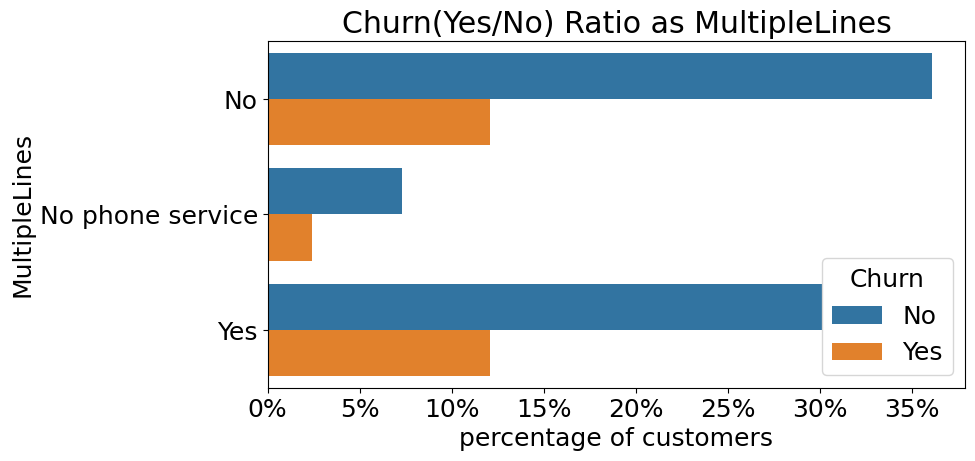

In [25]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("MultipleLines", orient='h')

C:\Users\wjyjy\AppData\Local\Temp\ipykernel_29996\82749636.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


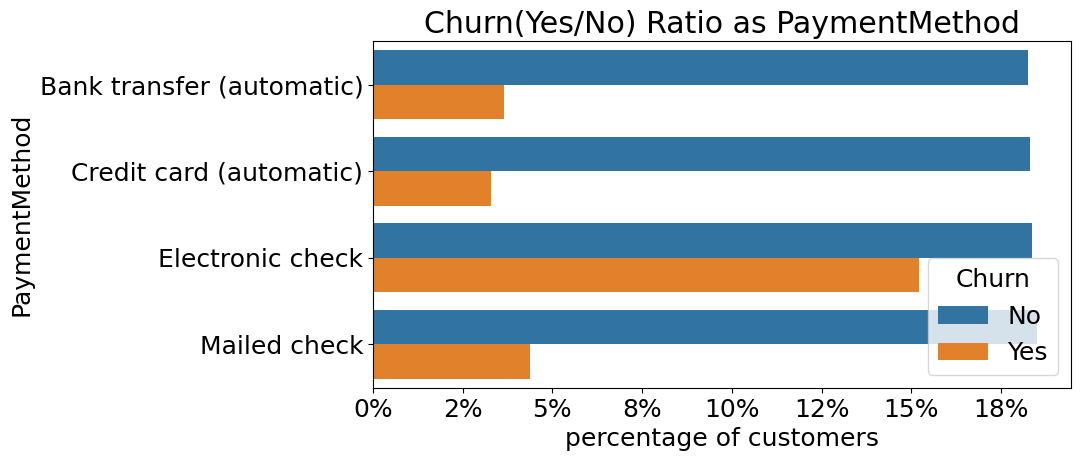

In [26]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod",orient='h')

In [27]:
customerDf = customerDf.drop(['customerID'], axis=1)

In [28]:
customerDf = customerDf.drop(['PhoneService'], axis=1)

In [29]:
customerDf.loc[:,'OnlineSecurity'].replace(to_replace='No internet service',value='No',inplace=True)

In [30]:
customerDf.loc[:,'OnlineBackup'].replace(to_replace='No internet service',value='No',inplace=True)

In [31]:
customerDf.loc[:,'DeviceProtection'].replace(to_replace='No internet service',value='No',inplace=True)

In [32]:
customerDf.loc[:,'TechSupport'].replace(to_replace='No internet service',value='No',inplace=True)

In [33]:
customerDf.loc[:,'StreamingMovies'].replace(to_replace='No internet service',value='No',inplace=True)

In [34]:
customerDf = customerDf.drop(['churn_rate'], axis=1)

## SPLIT

In [35]:
for x in customerDf.columns:
    test=customerDf.loc[:,x].value_counts()
    print('The number of rows of {0}：{1}'.format(x,test.sum()))
    print('The type of {0}：{1}'.format(x,customerDf[x].dtypes))
    print('The context of {0}：\n{1}\n'.format(x,test))

The number of rows of gender：7043
The type of gender：object
The context of gender：
Male      3555
Female    3488
Name: gender, dtype: int64

The number of rows of SeniorCitizen：7043
The type of SeniorCitizen：int32
The context of SeniorCitizen：
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

The number of rows of Partner：7043
The type of Partner：object
The context of Partner：
No     3641
Yes    3402
Name: Partner, dtype: int64

The number of rows of Dependents：7043
The type of Dependents：object
The context of Dependents：
No     4933
Yes    2110
Name: Dependents, dtype: int64

The number of rows of tenure：7043
The type of tenure：int32
The context of tenure：
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

The number of rows of MultipleLines：7043
The type of MultipleLines：object
The context of MultipleLines：
No                  3390
Yes                 2971
No phone service     682


In [38]:
from sklearn.model_selection import StratifiedKFold

## PREPROCCESS

- Looking at the data types, we find that except for "tenure", "MonthlyCharges", and "TotalCharges", which are continuous features, all the others are category features. For continuous features, standardscaler is better to use. For category features, one-hot encoding is used;

# CV

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
import xgboost
import warnings
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import shap
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\wjyjy\anaconda3\envs\data1030\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [40]:
y = customerDf['Churn']
X = customerDf.loc[:, customerDf.columns != 'Churn']

In [41]:

onehot_ftrs = ['gender','SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

std_ftrs = ['tenure', 'MonthlyCharges', 'TotalCharges']

# collect all the encoders into one preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'), onehot_ftrs),
        ('std', StandardScaler(), std_ftrs)])

prep = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess, later we will add other steps here

## Ridge Classifier

In [52]:
nr_states = 5
test_scores = np.zeros(nr_states)
final_models = []
test_set = []
for i in range(nr_states):
    print('randoms state '+str(i+1))
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=42*i)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=42*i)
    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)
    X_test_prep = prep.transform(X_test)
    
    test_set.append(pd.concat([pd.DataFrame(X_test_prep,columns=preprocessor.get_feature_names_out()),pd.DataFrame(np.reshape(np.array(y_test), (1, -1)).ravel(),columns=['y_true'])],axis=1))
    
    
    param_grid = {
                  'C':  [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e+5,1e+4,1e+3,1e+2,1e+1],
                  'max_iter':[10,100]             
                  } 
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score_f1 = np.zeros(len(ParameterGrid(param_grid)))
    models = []
    for p in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[p]
        print('   ',params) # initialize the classifier
        clf = LogisticRegression(**params,penalty='l2', solver='liblinear',random_state = 42*i)
        clf.fit(X_train_prep,y_train) # fit the model
        models.append(clf) # save it
        # calculate train and validation accuracy scores
        y_train_pred = clf.predict(X_train_prep)
        train_score[p] = accuracy_score(y_train,y_train_pred)
        y_val_pred = clf.predict(X_val_prep)
        val_score[p] = accuracy_score(y_val,y_val_pred)
        val_score_f1[p] = f1_score(y_val, y_val_pred,pos_label='Yes')
        print('   ',train_score[p],val_score[p],val_score_f1[p])
    print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation accuracy score:',np.max(val_score))
    # collect and save the best model
    final_models.append(models[np.argmax(val_score)])
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test accuracy score:',test_scores[i])
    print('test F1 score:', f1_score(y_test, y_test_pred,pos_label='Yes'))

randoms state 1
    {'max_iter': 10, 'C': 1e-05}
    0.7346745562130178 0.7345635202271115 0.0
    {'max_iter': 100, 'C': 1e-05}
    0.7346745562130178 0.7345635202271115 0.0
    {'max_iter': 10, 'C': 0.0001}
    0.7346745562130178 0.7345635202271115 0.0
    {'max_iter': 100, 'C': 0.0001}
    0.7346745562130178 0.7345635202271115 0.0
    {'max_iter': 10, 'C': 0.001}
    0.7763313609467456 0.772888573456352 0.33884297520661155
    {'max_iter': 100, 'C': 0.001}
    0.7763313609467456 0.772888573456352 0.33884297520661155
    {'max_iter': 10, 'C': 0.01}
    0.8054437869822485 0.7963094393186657 0.572280178837556
    {'max_iter': 100, 'C': 0.01}
    0.8054437869822485 0.7963094393186657 0.572280178837556
    {'max_iter': 10, 'C': 0.1}
    0.8073372781065089 0.7927608232789212 0.5887323943661972
    {'max_iter': 100, 'C': 0.1}
    0.8073372781065089 0.7927608232789212 0.5887323943661972
    {'max_iter': 10, 'C': 1}
    0.8073372781065089 0.7927608232789212 0.5921787709497207
    {'max_iter'

In [53]:
print('mean of F1 score:',np.mean(val_score_f1))
print('mean of accuracy:',np.mean(val_score))
print('std of F1 score:',np.std(val_score_f1))
print('std of accuracy:',np.std(val_score))

mean of F1 score: 0.4598090751274603
mean of accuracy: 0.7810826504935803
std of F1 score: 0.22827508238644284
std of accuracy: 0.022734043144037697


X has feature names, but LogisticRegression was fitted without feature names


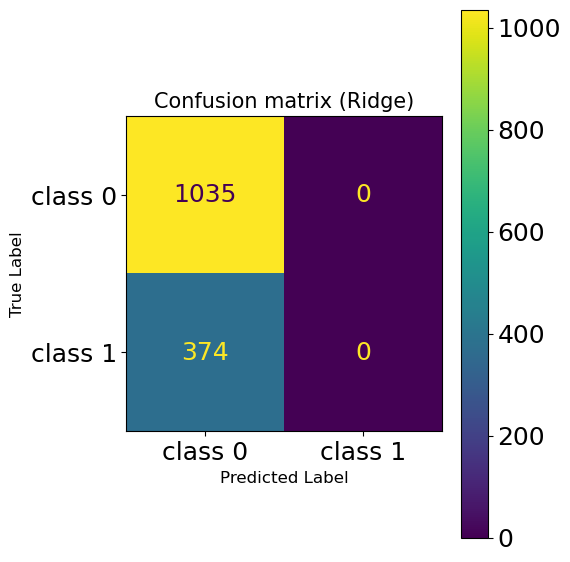

In [48]:
final_set=pd.DataFrame()

for i in range(0,1):
    y_pred = final_models[i].predict(test_set[i].iloc[:,test_set[i].columns!='y_true'])
    df_subset=pd.concat([test_set[i],pd.DataFrame(y_pred,columns=['y_pred'])],axis=1)
    final_set=pd.concat([final_set,df_subset])
cm = confusion_matrix(final_set['y_true'],final_set['y_pred'])
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
disp.plot()
plt.tight_layout()
plt.ylabel('True Label',fontsize=12)
plt.xlabel('Predicted Label',fontsize=12)
plt.title('Confusion matrix (Ridge)',fontsize=15)
savePic('Confusion matrix (Ridge)')
plt.show();

## Lasso Classifier

In [54]:
nr_states = 5
test_scores = np.zeros(nr_states)
final_models = []
for i in range(nr_states):
    print('randoms state '+str(i+1))
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=42*i)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=42*i)
    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)
    X_test_prep = prep.transform(X_test)
    
    test_set.append(pd.concat([pd.DataFrame(X_test_prep,columns=preprocessor.get_feature_names_out()),pd.DataFrame(np.reshape(np.array(y_test), (1, -1)).ravel(),columns=['y_true'])],axis=1))
    
    param_grid = {
                  'C':  [1e-5,1e-4,1e-3,1e-2,1e-1,1,1e+5,1e+4,1e+3,1e+2,1e+1],
                  'max_iter':[10,100]             
                  } 
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score_f1 = np.zeros(len(ParameterGrid(param_grid)))
    models = []
    for p in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[p]
        print('   ',params) # initialize the classifier
        clf = LogisticRegression(**params,penalty='l1', solver='liblinear',random_state = 42*i)
        clf.fit(X_train_prep,y_train) # fit the model
        models.append(clf) # save it
        # calculate train and validation accuracy scores
        y_train_pred = clf.predict(X_train_prep)
        train_score[p] = accuracy_score(y_train,y_train_pred)
        y_val_pred = clf.predict(X_val_prep)
        val_score[p] = accuracy_score(y_val,y_val_pred)
        val_score_f1[p] = f1_score(y_val, y_val_pred,pos_label='Yes')
        print('   ',train_score[p],val_score[p],val_score_f1[p])
    print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:',np.max(val_score))
    # collect and save the best model
    final_models.append(models[np.argmax(val_score)])
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test score:',test_scores[i])
    print('test F1 score:', f1_score(y_test, y_test_pred,pos_label='Yes'))

randoms state 1
    {'max_iter': 10, 'C': 1e-05}
    0.7346745562130178 0.7345635202271115 0.0
    {'max_iter': 100, 'C': 1e-05}
    0.7346745562130178 0.7345635202271115 0.0
    {'max_iter': 10, 'C': 0.0001}
    0.7346745562130178 0.7345635202271115 0.0
    {'max_iter': 100, 'C': 0.0001}
    0.7346745562130178 0.7345635202271115 0.0
    {'max_iter': 10, 'C': 0.001}
    0.7346745562130178 0.7345635202271115 0.0
    {'max_iter': 100, 'C': 0.001}
    0.7346745562130178 0.7345635202271115 0.0
    {'max_iter': 10, 'C': 0.01}


Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


    0.7891124260355029 0.7877927608232789 0.5041459369817579
    {'max_iter': 100, 'C': 0.01}
    0.7891124260355029 0.7885024840312278 0.5066225165562914
    {'max_iter': 10, 'C': 0.1}
    0.807810650887574 0.794889992902768 0.5841726618705035
    {'max_iter': 100, 'C': 0.1}
    0.8066272189349113 0.794180269694819 0.5821325648414986
    {'max_iter': 10, 'C': 1}
    0.8085207100591716 0.7920511000709723 0.5890603085553996
    {'max_iter': 100, 'C': 1}
    0.8080473372781065 0.7927608232789212 0.5910364145658263
    {'max_iter': 10, 'C': 100000.0}
    0.8089940828402367 0.7934705464868701 0.593006993006993
    {'max_iter': 100, 'C': 100000.0}
    0.807810650887574 0.794180269694819 0.5938375350140056
    {'max_iter': 10, 'C': 10000.0}
    0.8089940828402367 0.7934705464868701 0.593006993006993
    {'max_iter': 100, 'C': 10000.0}
    0.807810650887574 0.794180269694819 0.5938375350140056
    {'max_iter': 10, 'C': 1000.0}
    0.8089940828402367 0.7934705464868701 0.593006993006993
    {'

Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


    0.807810650887574 0.794180269694819 0.5938375350140056
    {'max_iter': 10, 'C': 100.0}
    0.8089940828402367 0.7934705464868701 0.593006993006993
    {'max_iter': 100, 'C': 100.0}
    0.807810650887574 0.794180269694819 0.5938375350140056
    {'max_iter': 10, 'C': 10.0}
    0.8089940828402367 0.7934705464868701 0.593006993006993
    {'max_iter': 100, 'C': 10.0}


Liblinear failed to converge, increase the number of iterations.
Liblinear failed to converge, increase the number of iterations.


    0.8073372781065089 0.794180269694819 0.5938375350140056
best model parameters: {'max_iter': 10, 'C': 0.1}
corresponding validation score: 0.794889992902768
test score: 0.8140525195173882
test F1 score: 0.6180758017492712


In [55]:
print('mean of F1 score:',np.mean(val_score_f1))
print('mean of accuracy:',np.mean(val_score))
print('std of F1 score:',np.std(val_score_f1))
print('std of accuracy:',np.std(val_score))

mean of F1 score: 0.4223360474307395
mean of accuracy: 0.7770823924124137
std of F1 score: 0.2597807605434173
std of accuracy: 0.026090860372405617


In [ ]:
final_set=pd.DataFrame()

for i in range(0,1):
    y_pred = final_models[i].predict(test_set[i].iloc[:,test_set[i].columns!='y_true'])
    df_subset=pd.concat([test_set[i],pd.DataFrame(y_pred,columns=['y_pred'])],axis=1)
    final_set=pd.concat([final_set,df_subset])
cm = confusion_matrix(final_set['y_true'],final_set['y_pred'])
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
disp.plot()
plt.tight_layout()
plt.ylabel('True Label',fontsize=12)
plt.xlabel('Predicted Label',fontsize=12)
plt.title('Confusion matrix (Lasso)',fontsize=15)
savePic('Confusion matrix (Lasso)')
plt.show();

## RF

In [ ]:
nr_states = 5
test_scores = np.zeros(nr_states)
final_models = []
for i in range(nr_states):
    print('randoms state '+str(i+1))
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=42*i)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=42*i)
    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)
    X_test_prep = prep.transform(X_test)
    
    test_set.append(pd.concat([pd.DataFrame(X_test_prep,columns=preprocessor.get_feature_names_out()),pd.DataFrame(np.reshape(np.array(y_test), (1, -1)).ravel(),columns=['y_true'])],axis=1))
    
    param_grid = {
                  'max_depth': [7,8,9,10,11,12,13,14], # no upper bound so the values are evenly spaced in log
                  'max_features': [0.25, 0.5,0.75,1.0] # linearly spaced because it is between 0 and 1, 0 is omitted
                  } 
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score_f1 = np.zeros(len(ParameterGrid(param_grid)))
    models = []
    for p in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[p]
        print('   ',params) 
        clf = RandomForestClassifier(**params,n_jobs=-1,random_state=42*i) # initialize the classifier
        clf.fit(X_train_prep,y_train) # fit the model
        models.append(clf) # save it
        # calculate train and validation accuracy scores
        y_train_pred = clf.predict(X_train_prep)
        train_score[p] = accuracy_score(y_train,y_train_pred)
        y_val_pred = clf.predict(X_val_prep)
        val_score[p] = accuracy_score(y_val,y_val_pred)
        val_score_f1[p] = f1_score(y_val, y_val_pred,pos_label='Yes')
        print('   ',train_score[p],val_score[p],val_score_f1[p])
    print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:',np.max(val_score))
    # collect and save the best model
    final_models.append(models[np.argmax(val_score)])
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test score:',test_scores[i])
    print('test F1 score:', f1_score(y_test, y_test_pred,pos_label='Yes'))

In [ ]:
print('mean of F1 score:',np.mean(val_score_f1))
print('mean of accuracy:',np.mean(val_score))
print('std of F1 score:',np.std(val_score_f1))
print('std of accuracy:',np.std(val_score))

In [ ]:
final_set=pd.DataFrame()

for i in range(0,1):
    y_pred = final_models[i].predict(test_set[i].iloc[:,test_set[i].columns!='y_true'])
    df_subset=pd.concat([test_set[i],pd.DataFrame(y_pred,columns=['y_pred'])],axis=1)
    final_set=pd.concat([final_set,df_subset])
cm = confusion_matrix(final_set['y_true'],final_set['y_pred'])
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
disp.plot()
plt.tight_layout()
plt.ylabel('True Label',fontsize=12)
plt.xlabel('Predicted Label',fontsize=12)
plt.title('Confusion matrix (RF)',fontsize=15)
savePic('Confusion matrix (RF)')
plt.show();


## XGboost

In [ ]:
nr_states = 5
test_scores = np.zeros(nr_states)
final_models = []
for i in range(nr_states):
    warnings.simplefilter(action='ignore', category=UserWarning)
    print('randoms state '+str(i+1))
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=42*i)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=42*i)
    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)
    X_test_prep = prep.transform(X_test)
    
    test_set.append(pd.concat([pd.DataFrame(X_test_prep,columns=preprocessor.get_feature_names_out()),pd.DataFrame(np.reshape(np.array(y_test), (1, -1)).ravel(),columns=['y_true'])],axis=1))
    
    param_grid = {"learning_rate": [0.03],
              "n_estimators": [100,1000],
              "max_depth": [3,5,7,9,11,13,15],
                'min_child_weight':[1,5,7,9],
                 # 'subsample':[0.5],
                'eval_metric':['auc']}
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score_f1 = np.zeros(len(ParameterGrid(param_grid)))
    models = []
    for p in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[p]
        print('   ',params) 
        clf = xgboost.sklearn.XGBClassifier(**params,random_state = 42*i,n_jobs=-1) # initialize the classifier
        clf.fit(X_train_prep,y_train) # fit the model
        models.append(clf) # save it
        # calculate train and validation accuracy scores
        y_train_pred = clf.predict(X_train_prep)
        train_score[p] = accuracy_score(y_train,y_train_pred)
        y_val_pred = clf.predict(X_val_prep)
        val_score[p] = accuracy_score(y_val,y_val_pred)
        val_score_f1[p] = f1_score(y_val, y_val_pred,pos_label='Yes')
        print('   ',train_score[p],val_score[p],val_score_f1[p])
    print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:',np.max(val_score))
    # collect and save the best model
    final_models.append(models[np.argmax(val_score)])
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test score:',test_scores[i])
    print('test F1 score:', f1_score(y_test, y_test_pred,pos_label='Yes'))

In [ ]:
print('mean of F1 score:',np.mean(val_score_f1))
print('mean of accuracy:',np.mean(val_score))
print('std of F1 score:',np.std(val_score_f1))
print('std of accuracy:',np.std(val_score))

In [ ]:
final_set=pd.DataFrame()

for i in range(0,1):
    y_pred = final_models[i].predict(test_set[i].iloc[:,test_set[i].columns!='y_true'])
    df_subset=pd.concat([test_set[i],pd.DataFrame(y_pred,columns=['y_pred'])],axis=1)
    final_set=pd.concat([final_set,df_subset])
cm = confusion_matrix(final_set['y_true'],final_set['y_pred'])
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
disp.plot()
plt.tight_layout()
plt.ylabel('True Label',fontsize=12)
plt.xlabel('Predicted Label',fontsize=12)
plt.title('Confusion matrix (XGBoost)',fontsize=15)
savePic('Confusion matrix (XGBoost)')
plt.show();


In [ ]:
test_set = []
X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=42)
X_train_prep = prep.fit_transform(X_train)
X_val_prep = prep.transform(X_val)
X_test_prep = prep.transform(X_test)

test_set.append(pd.DataFrame(X_test_prep,columns=preprocessor.get_feature_names_out()))

param_grid = {"learning_rate": [0.03],
              "n_estimators": [100],
              "max_depth": [5],
                'min_child_weight':[5],
                 # 'subsample':[0.5],
                'eval_metric':['logloss']}
clf = xgboost.sklearn.XGBClassifier(**params,random_state = 42,n_jobs=-1) # initialize the classifier
clf.fit(X_train_prep,y_train)
clf.feature_importances_
test_set = pd.DataFrame(test_set[0])

In [ ]:
test_set

In [ ]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(test_set)
shap.summary_plot(shap_values, test_set, plot_type="bar",max_display=10,show=False)
savePic('global1')

In [ ]:
shap.summary_plot(shap_values, test_set,max_display=10,show=False)
savePic('global2')

In [ ]:
from scipy.special import expit
expit(-3.73)

In [ ]:
shap.initjs()
import matplotlib.pyplot as pyplot
index = 0
shap.force_plot(explainer.expected_value, 
                shap_values[index,:], 
                test_set.iloc[index,:],link = 'logit',matplotlib=False)
#savePic('local')
#,show=False

## SVC

In [57]:
nr_states = 5
test_scores = np.zeros(nr_states)
final_models = []
test_set = []

for i in range(nr_states):
    print('randoms state '+str(i+1))
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=42*i)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=42*i)
    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)
    X_test_prep = prep.transform(X_test)
    
    test_set.append(pd.concat([pd.DataFrame(X_test_prep,columns=preprocessor.get_feature_names_out()),pd.DataFrame(np.reshape(np.array(y_test), (1, -1)).ravel(),columns=['y_true'])],axis=1))
    
    param_grid = {
                   
                  'max_iter':[10,100] ,
                    'C': [1e-3,1e-2,1e-1, 1e0, 1e1,1e2] 
                  } 
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score_f1 = np.zeros(len(ParameterGrid(param_grid)))
    models = []
    for p in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[p]
        print('   ',params) 
        clf = SVC(**params,random_state = 42*i) # initialize the classifier
        clf.fit(X_train_prep,y_train) # fit the model
        models.append(clf) # save it
        # calculate train and validation accuracy scores
        y_train_pred = clf.predict(X_train_prep)
        train_score[p] = accuracy_score(y_train,y_train_pred)
        y_val_pred = clf.predict(X_val_prep)
        val_score[p] = accuracy_score(y_val,y_val_pred)
        val_score_f1[p] = f1_score(y_val, y_val_pred,pos_label='Yes')
        print('   ',train_score[p],val_score[p],val_score_f1[p])
    print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:',np.max(val_score))
    # collect and save the best model
    final_models.append(models[np.argmax(val_score)])
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test score:',test_scores[i])
    print('test F1 score:', f1_score(y_test, y_test_pred,pos_label='Yes'))

randoms state 1
    {'max_iter': 10, 'C': 0.001}
    0.7618934911242603 0.7558552164655784 0.4707692307692308
    {'max_iter': 100, 'C': 0.001}
    0.754792899408284 0.7544357700496807 0.46932515337423314
    {'max_iter': 10, 'C': 0.01}


Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.7618934911242603 0.7558552164655784 0.4707692307692308
    {'max_iter': 100, 'C': 0.01}
    0.754792899408284 0.7544357700496807 0.46932515337423314
    {'max_iter': 10, 'C': 0.1}
    0.7618934911242603 0.7558552164655784 0.4707692307692308
    {'max_iter': 100, 'C': 0.1}


Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.6892307692307692 0.6962384669978708 0.5091743119266056
    {'max_iter': 10, 'C': 1.0}
    0.703905325443787 0.7139815471965933 0.5466816647919011
    {'max_iter': 100, 'C': 1.0}
    0.7185798816568048 0.7104329311568488 0.5466666666666667
    {'max_iter': 10, 'C': 10.0}
    0.7737278106508876 0.7778566359119943 0.5362962962962963
    {'max_iter': 100, 'C': 10.0}


Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.7337278106508875 0.7239176721078779 0.5155666251556662
    {'max_iter': 10, 'C': 100.0}
    0.3003550295857988 0.28743789921930446 0.276657060518732
    {'max_iter': 100, 'C': 100.0}
    0.6755029585798816 0.681334279630944 0.4937993235625704
best model parameters: {'max_iter': 10, 'C': 10.0}
corresponding validation score: 0.7778566359119943
test score: 0.7743080198722498
test F1 score: 0.5253731343283583
randoms state 2
    {'max_iter': 10, 'C': 0.001}


Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.6783431952662722 0.673527324343506 0.15441176470588236
    {'max_iter': 100, 'C': 0.001}
    0.7687573964497041 0.7686302342086586 0.5687830687830687
    {'max_iter': 10, 'C': 0.01}
    0.6783431952662722 0.673527324343506 0.15441176470588236
    {'max_iter': 100, 'C': 0.01}


Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.7533727810650888 0.7508871540099361 0.5595984943538268
    {'max_iter': 10, 'C': 0.1}
    0.677396449704142 0.6749467707594038 0.14869888475836432
    {'max_iter': 100, 'C': 0.1}
    0.7152662721893491 0.71611071682044 0.5238095238095238
    {'max_iter': 10, 'C': 1.0}
    0.683076923076923 0.6792051100070973 0.15671641791044777
    {'max_iter': 100, 'C': 1.0}


Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.7256804733727811 0.7246273953158269 0.3378839590443686
    {'max_iter': 10, 'C': 10.0}
    0.6646153846153846 0.674237047551455 0.19047619047619047
    {'max_iter': 100, 'C': 10.0}
    0.7521893491124261 0.7459190915542938 0.5686746987951808
    {'max_iter': 10, 'C': 100.0}
    0.7197633136094674 0.7246273953158269 0.0
    {'max_iter': 100, 'C': 100.0}


Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.6939644970414202 0.6926898509581263 0.10351966873706005
best model parameters: {'max_iter': 100, 'C': 0.001}
corresponding validation score: 0.7686302342086586
test score: 0.7466288147622427
test F1 score: 0.5284015852047557
randoms state 3
    {'max_iter': 10, 'C': 0.001}
    0.6821301775147929 0.6933995741660752 0.136
    {'max_iter': 100, 'C': 0.001}


Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.7578698224852071 0.7537260468417317 0.6016073478760047
    {'max_iter': 10, 'C': 0.01}
    0.6821301775147929 0.6933995741660752 0.136
    {'max_iter': 100, 'C': 0.01}
    0.7578698224852071 0.7537260468417317 0.6016073478760047
    {'max_iter': 10, 'C': 0.1}
    0.6821301775147929 0.6933995741660752 0.136
    {'max_iter': 100, 'C': 0.1}


Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.7801183431952663 0.7849538679914834 0.6007905138339921
    {'max_iter': 10, 'C': 1.0}
    0.7046153846153846 0.7083037615330021 0.1696969696969697
    {'max_iter': 100, 'C': 1.0}
    0.7254437869822485 0.7366926898509581 0.57307249712313
    {'max_iter': 10, 'C': 10.0}
    0.6821301775147929 0.6777856635911994 0.42091836734693877
    {'max_iter': 100, 'C': 10.0}


Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.682603550295858 0.6891412349183819 0.524945770065076
    {'max_iter': 10, 'C': 100.0}
    0.610887573964497 0.6217175301632364 0.5185185185185186
    {'max_iter': 100, 'C': 100.0}
    0.7602366863905325 0.7530163236337828 0.5660847880299252
best model parameters: {'max_iter': 100, 'C': 0.1}
corresponding validation score: 0.7849538679914834
test score: 0.7601135557132718
test F1 score: 0.554089709762533
randoms state 4
    {'max_iter': 10, 'C': 0.001}
    0.7353846153846154 0.7565649396735273 0.606199770378875
    {'max_iter': 100, 'C': 0.001}
    0.685207100591716 0.6784953867991483 0.5315408479834539
    {'max_iter': 10, 'C': 0.01}
    0.7353846153846154 0.7565649396735273 0.606199770378875
    {'max_iter': 100, 'C': 0.01}


Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.6719526627218935 0.6678495386799148 0.528225806451613
    {'max_iter': 10, 'C': 0.1}
    0.7353846153846154 0.7565649396735273 0.606199770378875
    {'max_iter': 100, 'C': 0.1}
    0.6617751479289941 0.6572036905606813 0.527859237536657
    {'max_iter': 10, 'C': 1.0}
    0.6295857988165681 0.6295244854506742 0.5314183123877919
    {'max_iter': 100, 'C': 1.0}


Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.7855621301775148 0.7835344215755855 0.5611510791366906
    {'max_iter': 10, 'C': 10.0}
    0.6868639053254438 0.7004968062455642 0.12083333333333332
    {'max_iter': 100, 'C': 10.0}
    0.6920710059171598 0.6905606813342796 0.441025641025641
    {'max_iter': 10, 'C': 100.0}
    0.6288757396449705 0.6330731014904187 0.11623931623931623
    {'max_iter': 100, 'C': 100.0}


Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.6695857988165681 0.6827537260468417 0.486796785304248
best model parameters: {'max_iter': 100, 'C': 1.0}
corresponding validation score: 0.7835344215755855
test score: 0.7778566359119943
test F1 score: 0.5706447187928668
randoms state 5
    {'max_iter': 10, 'C': 0.001}
    0.7384615384615385 0.7295954577714692 0.6002098635886673
    {'max_iter': 100, 'C': 0.001}


Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.6707692307692308 0.681334279630944 0.4583835946924005
    {'max_iter': 10, 'C': 0.01}
    0.7384615384615385 0.7295954577714692 0.6002098635886673
    {'max_iter': 100, 'C': 0.01}
    0.6783431952662722 0.6657203690560681 0.45674740484429066
    {'max_iter': 10, 'C': 0.1}
    0.7763313609467456 0.7750177430801988 0.5877763328998699
    {'max_iter': 100, 'C': 0.1}


Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.720473372781065 0.7217885024840313 0.5062972292191436
    {'max_iter': 10, 'C': 1.0}
    0.7801183431952663 0.7771469127040455 0.5890052356020942
    {'max_iter': 100, 'C': 1.0}
    0.700828402366864 0.6976579134137686 0.47146401985111663
    {'max_iter': 10, 'C': 10.0}
    0.7247337278106509 0.7111426543647977 0.571127502634352
    {'max_iter': 100, 'C': 10.0}


Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


    0.7649704142011834 0.7544357700496807 0.512676056338028
    {'max_iter': 10, 'C': 100.0}
    0.5860355029585799 0.5770049680624556 0.49915966386554617
    {'max_iter': 100, 'C': 100.0}
    0.6771597633136095 0.6777856635911994 0.28840125391849536
best model parameters: {'max_iter': 10, 'C': 1.0}
corresponding validation score: 0.7771469127040455
test score: 0.7792760823278921
test F1 score: 0.600770218228498


Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.


In [ ]:
nr_states = 5
test_scores = np.zeros(nr_states)
final_models = []
test_set = []

for i in range(j):
    print('randoms state '+str(i+1))
    X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,stratify=y,random_state=42*i)
    X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,stratify=y_other,random_state=42*i)
    X_train_prep = prep.fit_transform(X_train)
    X_val_prep = prep.transform(X_val)
    X_test_prep = prep.transform(X_test)
    
    test_set.append(pd.concat([pd.DataFrame(X_test_prep,columns=preprocessor.get_feature_names_out()),pd.DataFrame(np.reshape(np.array(y_test), (1, -1)).ravel(),columns=['y_true'])],axis=1))
    
    param_grid = {
                   
                  'max_iter':[10,100] ,
                    'C': [1e-3,1e-2,1e-1, 1e0, 1e1,1e2] 
                  } 
    train_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score = np.zeros(len(ParameterGrid(param_grid)))
    val_score_f1 = np.zeros(len(ParameterGrid(param_grid)))
    models = []
    for p in range(len(ParameterGrid(param_grid))):
        params = ParameterGrid(param_grid)[p]
        print('   ',params) 
        clf = SVC(**params,random_state = 42*i) # initialize the classifier
        clf.fit(X_train_prep,y_train) # fit the model
        models.append(clf) # save it
        # calculate train and validation accuracy scores
        y_train_pred = clf.predict(X_train_prep)
        train_score[p] = accuracy_score(y_train,y_train_pred)
        y_val_pred = clf.predict(X_val_prep)
        val_score[p] = accuracy_score(y_val,y_val_pred)
        val_score_f1[p] = f1_score(y_val, y_val_pred,pos_label='Yes')
        print('   ',train_score[p],val_score[p],val_score_f1[p])
    print('best model parameters:',ParameterGrid(param_grid)[np.argmax(val_score)])
    print('corresponding validation score:',np.max(val_score))
    # collect and save the best model
    final_models.append(models[np.argmax(val_score)])
    # calculate and save the test score
    y_test_pred = final_models[-1].predict(X_test_prep)
    test_scores[i] = accuracy_score(y_test,y_test_pred)
    print('test score:',test_scores[i])
    print('test F1 score:', f1_score(y_test, y_test_pred,pos_label='Yes'))

In [58]:
print('mean of F1 score:',np.mean(val_score_f1))
print('mean of accuracy:',np.mean(val_score))
print('std of F1 score:',np.std(val_score_f1))
print('std of accuracy:',np.std(val_score))

mean of F1 score: 0.5117881684202227
mean of accuracy: 0.7081854743316773
std of F1 score: 0.08587506822273071
std of accuracy: 0.05263036127308185


In [ ]:
final_set=pd.DataFrame()

for i in range(0,1):
    y_pred = final_models[i].predict(test_set[i].iloc[:,test_set[i].columns!='y_true'])
    df_subset=pd.concat([test_set[i],pd.DataFrame(y_pred,columns=['y_pred'])],axis=1)
    final_set=pd.concat([final_set,df_subset])
cm = confusion_matrix(final_set['y_true'],final_set['y_pred'])
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
disp.plot()
plt.tight_layout()
plt.ylabel('True Label',fontsize=12)
plt.xlabel('Predicted Label',fontsize=12)
plt.title('Confusion matrix (SVC)',fontsize=15)
savePic('Confusion matrix (SVC)')
plt.show();
